In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import time
from datetime import datetime
sns.set_style("whitegrid")
prevdata_df = pd.read_csv("C:/Users/umprasad/Desktop/EDA/previous_application.csv")
currdata_df = pd.read_csv("C:/Users/umprasad/Desktop/EDA/application_data.csv")

### Finding common SK_ID of Previous and Current data samples for analysis

In [2]:
intersection_df = prevdata_df[~prevdata_df["SK_ID_CURR"].isin(currdata_df["SK_ID_CURR"])].copy()

In [3]:
intersection_df.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
13,1397919,321676,Consumer loans,7654.86,53779.5,57564.0,0.0,53779.5,SUNDAY,15,...,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
14,2273188,270658,Consumer loans,9644.22,26550.0,27252.0,0.0,26550.0,SATURDAY,10,...,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0


### Separating the current data samples into 2 categories based on Target

In [4]:
dfTarget1 = currdata_df.loc[currdata_df.TARGET==1]
dfTarget0 = currdata_df.loc[currdata_df.TARGET==0]

### Dividing the intersection data set of previous and current data samples into 2 categories based on Target values

In [5]:
intersection_df1 = prevdata_df[~prevdata_df["SK_ID_CURR"].isin(dfTarget1["SK_ID_CURR"])].copy()
intersection_df0 = prevdata_df[~prevdata_df["SK_ID_CURR"].isin(dfTarget0["SK_ID_CURR"])].copy()

In [6]:
intersection_df1.insert(0, 'TARGET', 1)
intersection_df0.insert(0, 'TARGET', 0)

In [7]:
intersection_dfX = pd.concat([intersection_df0, intersection_df1]) 

In [35]:
#Concatenating the above data set
intersec_df = pd.concat([intersection_df0, intersection_df1]) 

In [8]:
# re-setting the index
intersection_dfX = intersection_dfX.reset_index(drop=True)


In [9]:
intersection_dfX.head(2)

,TARGET,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,1397919,321676,Consumer loans,7654.86,53779.5,57564.0,0.0,53779.5,SUNDAY,...,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
1,0,2273188,270658,Consumer loans,9644.22,26550.0,27252.0,0.0,26550.0,SATURDAY,...,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0


In [10]:
# Determing the non-numeric/Categorical columns
tot_col = intersection_dfX.columns
num_col = intersection_dfX._get_numeric_data().columns
col = list(set(tot_col) - set(num_col))
length = len(col)
print(col)
print(length)
new_inter_dfX = intersection_dfX[col].copy()

['WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_PRODUCT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_PORTFOLIO', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_SELLER_INDUSTRY', 'CHANNEL_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE']
16


In [11]:
# getting the unique values in categorical columns
for i in col:
    print (i)
    print("--"*30)
    print(new_inter_dfX[i].unique())
    print("--"*30)

WEEKDAY_APPR_PROCESS_START
------------------------------------------------------------
['SUNDAY' 'SATURDAY' 'FRIDAY' 'WEDNESDAY' 'THURSDAY' 'MONDAY' 'TUESDAY']
------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
------------------------------------------------------------
['Y' 'N']
------------------------------------------------------------
NAME_PRODUCT_TYPE
------------------------------------------------------------
['XNA' 'x-sell' 'walk-in']
------------------------------------------------------------
NAME_PAYMENT_TYPE
------------------------------------------------------------
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
------------------------------------------------------------
NAME_CLIENT_TYPE
------------------------------------------------------------
['New' 'Repeater' 'Refreshed' 'XNA']
------------------------------------------------------------
CODE_REJECT_REASON
----------

In [12]:
new_inter_dfX.head(2)

,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_PRODUCT_TYPE,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CODE_REJECT_REASON,NAME_PORTFOLIO,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_TYPE_SUITE,NAME_GOODS_CATEGORY,NAME_CASH_LOAN_PURPOSE,NAME_SELLER_INDUSTRY,CHANNEL_TYPE,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE
0,SUNDAY,Y,XNA,Cash through the bank,New,XAP,POS,low_action,POS household without interest,Unaccompanied,Consumer Electronics,XAP,Consumer electronics,Country-wide,Approved,Consumer loans
1,SATURDAY,Y,XNA,Cash through the bank,New,XAP,POS,middle,POS household with interest,NaN,Construction Materials,XAP,Consumer electronics,Stone,Approved,Consumer loans


In [ ]:
# Mapping field value of categorical columns for further analysis

In [26]:
intersection_dfX['NAME_PAYMENT_TYPE'] = intersection_dfX['NAME_PAYMENT_TYPE'].map({
                                   'Cash through the bank':1, 'XNA':0, 'Non-cash from your account':2,
 'Cashless from the account of the employer':3})

In [27]:
intersection_dfX['NAME_CONTRACT_STATUS'] = intersection_dfX['NAME_CONTRACT_STATUS'].map({
  'Approved':1, 'Unused offer':0, 'Refused':2, 'Canceled':3 })

intersection_dfX['CODE_REJECT_REASON'] = intersection_dfX['CODE_REJECT_REASON'].map({
  'XAP':0, 'CLIENT':1, 'HC':2, 'LIMIT':3, 'SCOFR':4, 'SCO':5, 'XNA':0, 'VERIF':6, 'SYSTEM':7                                
})

intersection_dfX['NAME_TYPE_SUITE'] = intersection_dfX['NAME_TYPE_SUITE'].map({
  'Unaccompanied':0, 'Spouse, partner':1, 'Family':2, 'Children':3, 'Other_B':5,
 'Other_A':5, 'Group of people':4                               
})

intersection_dfX['NAME_PORTFOLIO'] = intersection_dfX['NAME_PORTFOLIO'].map({
  'POS':1, 'Cards':2, 'Cash':3, 'XNA':0, 'Cars':5                               
})

intersection_dfX['FLAG_LAST_APPL_PER_CONTRACT'] = intersection_dfX['FLAG_LAST_APPL_PER_CONTRACT'].map({
  'Y':1, 'N':2                               
})

intersection_dfX['NAME_PRODUCT_TYPE'] = intersection_dfX['NAME_PRODUCT_TYPE'].map({
  'XNA':0, 'x-sell':1, 'walk-in':2                                
})

intersection_dfX['WEEKDAY_APPR_PROCESS_START'] = intersection_dfX['WEEKDAY_APPR_PROCESS_START'].map({
  'SUNDAY':7, 'SATURDAY':6, 'FRIDAY':5, 'WEDNESDAY':3, 'THURSDAY':4, 'MONDAY':1, 'TUESDAY':2                               
})

intersection_dfX['NAME_YIELD_GROUP'] = intersection_dfX['NAME_YIELD_GROUP'].map({
  'low_action':3, 'middle':2, 'XNA':0, 'high':1, 'low_normal':3                             
})

intersection_dfX['NAME_SELLER_INDUSTRY'] = intersection_dfX['NAME_SELLER_INDUSTRY'].map({
  'Consumer electronics':2, 'XNA':0, 'Connectivity':1, 'Clothing':4, 'Industry':3,
 'Furniture':5, 'Construction':6, 'Auto technology':7, 'Jewelry':8, 'Tourism':9,
 'MLM partners':10                                
})

intersection_dfX['NAME_CLIENT_TYPE'] = intersection_dfX['NAME_CLIENT_TYPE'].map({
  'New':1, 'Repeater':3, 'Refreshed':2, 'XNA':0                               
})

intersection_dfX['CHANNEL_TYPE'] = intersection_dfX['CHANNEL_TYPE'].map({
 'Country-wide':1, 'Stone':2, 'AP+ (Cash loan)':3, 'Regional / Local':4,
 'Credit and cash offices':5, 'Contact center':6, 'Channel of corporate sales':7,
 'Car dealer':8                             
})

intersection_dfX['NAME_CONTRACT_TYPE'] = intersection_dfX['NAME_CONTRACT_TYPE'].map({
 'Consumer loans':3, 'Revolving loans':2, 'Cash loans':1, 'XNA':0                             
})


### Univariate Analysis for Categorical columns

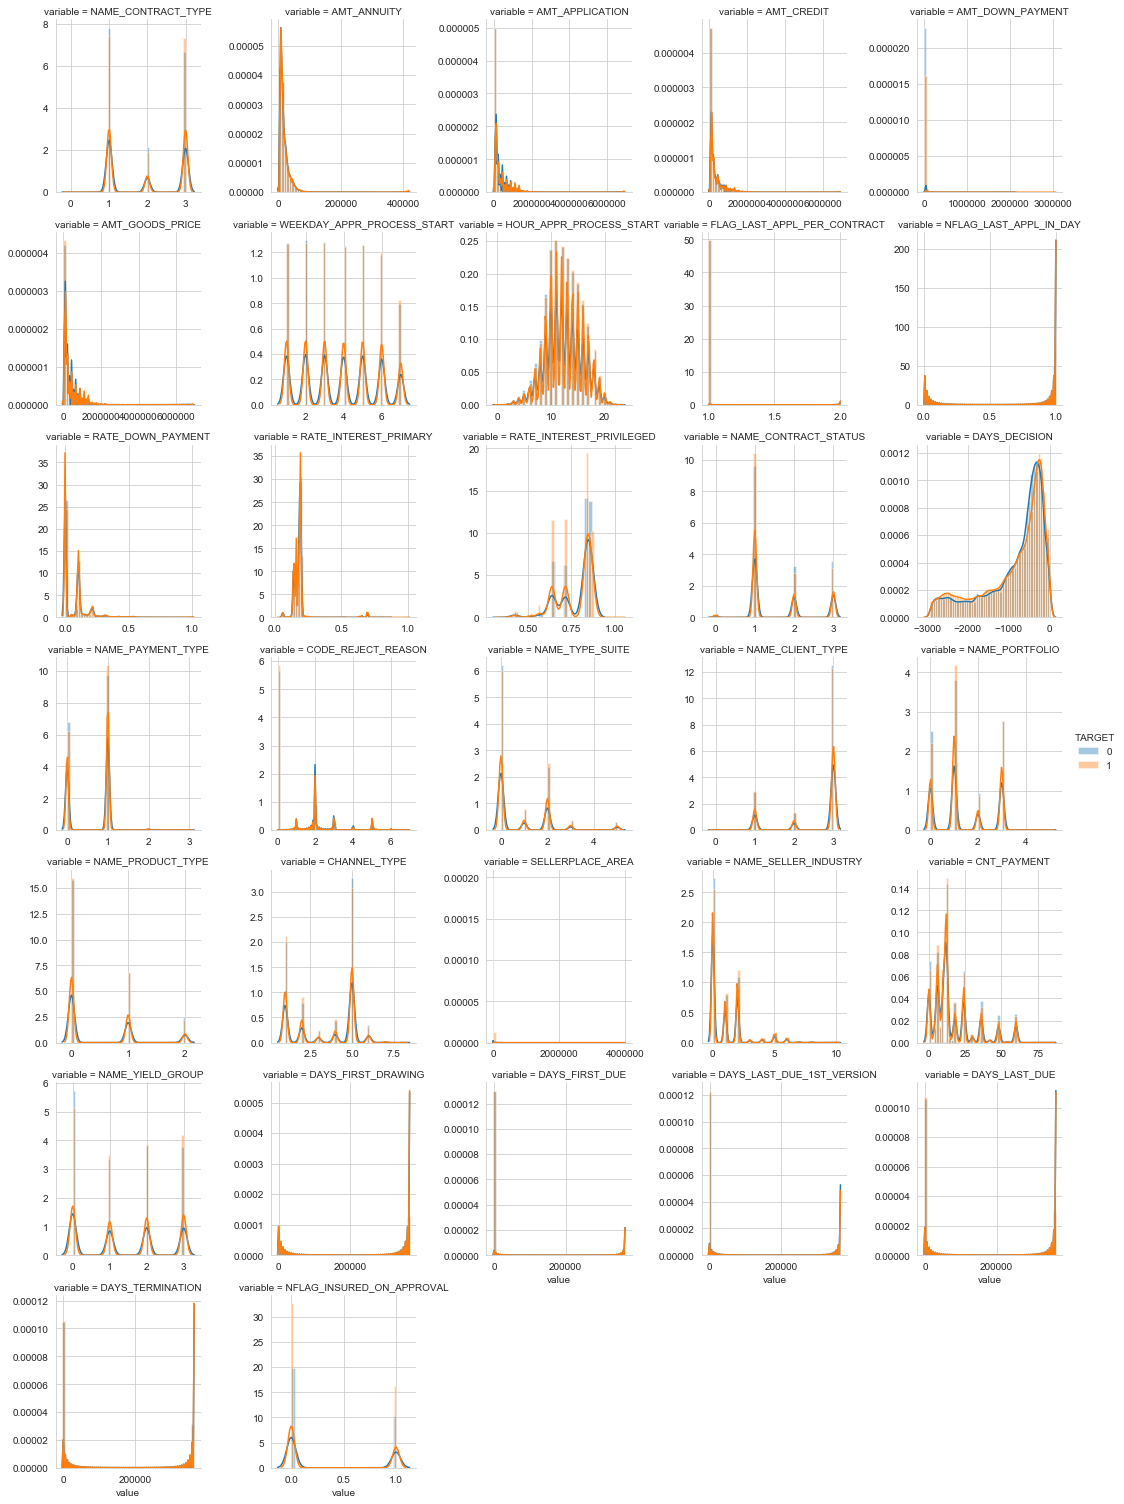

In [28]:
output = 'TARGET'
cols = [ i for i in intersection_dfX.columns if intersection_dfX.dtypes[i] != "object"]
cols.remove( "SK_ID_CURR")
cols.remove( "SK_ID_PREV")
cols.remove( output )
f = pd.melt( intersection_dfX, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

### Observations:

In [37]:
intersec_df.tail(2)

,TARGET,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670212,1,2785582,400317,Cash loans,18821.52,180000.0,191880.0,NaN,180000.0,WEDNESDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,1,2418762,261212,Cash loans,16431.30,360000.0,360000.0,NaN,360000.0,SUNDAY,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [38]:
inter_dfTarget1 = intersec_df.loc[intersec_df.TARGET==1]
inter_dfTarget0 = intersec_df.loc[intersec_df.TARGET==0]

In [39]:
#appdata_df0['TARGET'] = appdata_df0['TARGET'].map({0:1})
inter_dfTarget1.head(2)

,TARGET,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [40]:
inter_dfTarget0.head(2)

,TARGET,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
13,0,1397919,321676,Consumer loans,7654.86,53779.5,57564.0,0.0,53779.5,SUNDAY,...,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
14,0,2273188,270658,Consumer loans,9644.22,26550.0,27252.0,0.0,26550.0,SATURDAY,...,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0


### Bivariate Analysis & Pivot tables for data distribution 

In [41]:
inter_dfTarget0['TARGET'] = inter_dfTarget0['TARGET'].map({0:1})

C:\Users\umprasad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS'],aggfunc=np.sum)

TARGET
NAME_CLIENT_TYPE NAME_CONTRACT_STATUS        
New              Approved               60247
                 Canceled                1052
                 Refused                 3444
                 Unused offer             425
Refreshed        Approved               19610
                 Canceled                4765
                 Refused                 3968
                 Unused offer             802
Repeater         Approved              137894
                 Canceled               74603
                 Refused                67202
                 Unused offer            4310
XNA              Approved                 174
                 Canceled                 258
                 Refused                  112
                 Unused offer               7

In [44]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS'],aggfunc=np.sum)

TARGET
NAME_CLIENT_TYPE NAME_CONTRACT_STATUS        
New              Approved              259876
                 Canceled                3124
                 Refused                13060
                 Unused offer            1958
Refreshed        Approved               91699
                 Canceled               18257
                 Refused                13561
                 Unused offer            3700
Repeater         Approved              617416
                 Canceled              270243
                 Refused               234303
                 Unused offer           18869
XNA              Approved                 547
                 Canceled                 895
                 Refused                  316
                 Unused offer              30

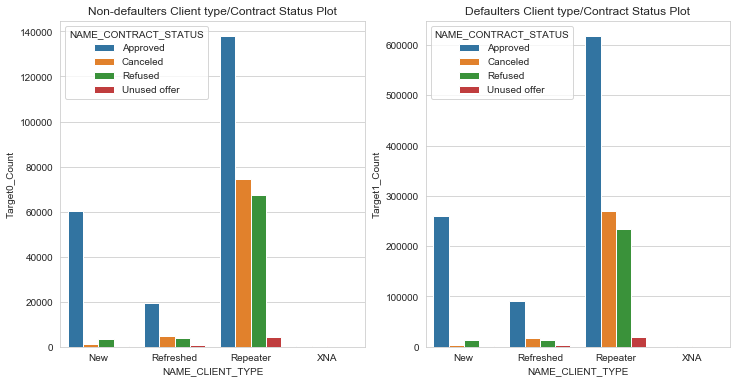

In [46]:
prev_analysis1_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='Target0_Count')
prev_analysis1_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot( x ='NAME_CLIENT_TYPE',y='Target0_Count', hue="NAME_CONTRACT_STATUS", data=prev_analysis1_df0)
plt.title("Non-defaulters Client type/Contract Status Plot")
plt.subplot(1, 2, 2)
sns.barplot( x ='NAME_CLIENT_TYPE',y='Target1_Count', hue="NAME_CONTRACT_STATUS", data=prev_analysis1_df1)
plt.title("Defaulters Client type/Contract Status Plot")
plt.show()

### Observations:

In [47]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS        
Cash loans         Approved               66275
                   Canceled               67690
                   Refused                43919
                   Unused offer             102
Consumer loans     Approved              128842
                   Canceled                 401
                   Refused                17418
                   Unused offer            5441
Revolving loans    Approved               22808
                   Canceled               12500
                   Refused                13380
                   Unused offer               1
XNA                Canceled                  87
                   Refused                    9

In [48]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS        
Cash loans         Approved              292424
                   Canceled              249109
                   Refused               148369
                   Unused offer             454
Consumer loans     Approved              586788
                   Canceled                1388
                   Refused                68670
                   Unused offer           24098
Revolving loans    Approved               90326
                   Canceled               41763
                   Refused                44177
                   Unused offer               5
XNA                Canceled                 259
                   Refused                   24

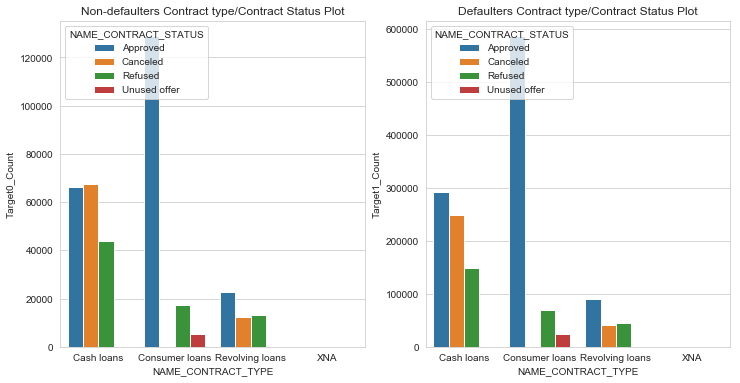

In [54]:
prev_analysis2_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='Target0_Count')
prev_analysis2_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot( x ='NAME_CONTRACT_TYPE',y='Target0_Count', hue="NAME_CONTRACT_STATUS", data=prev_analysis2_df0)
plt.title("Non-defaulters Contract type/Contract Status Plot")
plt.subplot(1, 2, 2)
sns.barplot( x ='NAME_CONTRACT_TYPE',y='Target1_Count', hue="NAME_CONTRACT_STATUS", data=prev_analysis2_df1)
plt.title("Defaulters Contract type/Contract Status Plot")
plt.show()

### Observations:

In [57]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_TYPE','CODE_REJECT_REASON'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE CODE_REJECT_REASON        
Cash loans         CLIENT                 102
                   HC                   32158
                   LIMIT                 5378
                   SCO                   3157
                   SCOFR                 2059
                   SYSTEM                  12
                   VERIF                  582
                   XAP                 133965
                   XNA                    573
Consumer loans     CLIENT                5441
                   HC                    5250
                   LIMIT                 7275
                   SCO                   4221
                   SCOFR                  141
                   SYSTEM                   5
                   VERIF                  115
                   XAP                 129243
                   XNA                    411
Revolving loans    CLIENT                   1
                   HC                    8960
                   LIMIT                 1254
                   SCO                    716
                   SCOFR                 2012
                   SYSTEM                  70
                   VERIF                   44
                   XAP                  35308
                   XNA                    324
XNA                HC                       9
                   XAP                     87

In [58]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_TYPE','CODE_REJECT_REASON'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE CODE_REJECT_REASON        
Cash loans         CLIENT                 454
                   HC                  108909
                   LIMIT                18606
                   SCO                  12077
                   SCOFR                 4430
                   SYSTEM                  46
                   VERIF                 2512
                   XAP                 541533
                   XNA                   1789
Consumer loans     CLIENT               24098
                   HC                   20073
                   LIMIT                26414
                   SCO                  19474
                   SCOFR                  442
                   SYSTEM                  27
                   VERIF                  548
                   XAP                 588168
                   XNA                   1700
Revolving loans    CLIENT                   5
                   HC                   29097
                   LIMIT                 4660
                   SCO                   2653
                   SCOFR                 5663
                   SYSTEM                 602
                   VERIF                  190
                   XAP                 132090
                   XNA                   1311
XNA                HC                      22
                   XAP                    259
                   XNA                      2

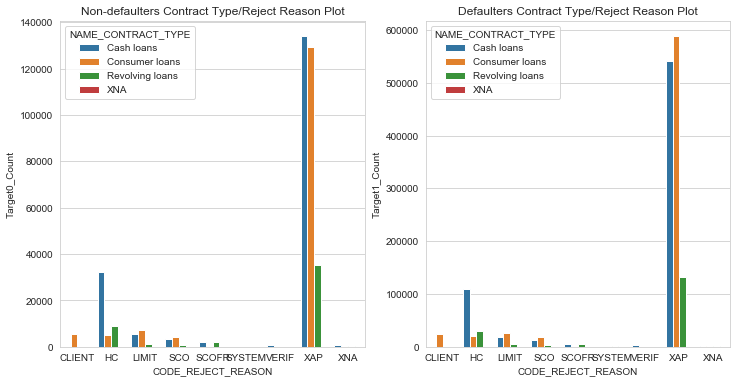

In [62]:
prev_analysis3_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_TYPE','CODE_REJECT_REASON']).size().reset_index(name='Target0_Count')
prev_analysis3_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_TYPE','CODE_REJECT_REASON']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot( x ='CODE_REJECT_REASON',y='Target0_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df0)
plt.title("Non-defaulters Contract Type/Reject Reason Plot")
plt.subplot(1, 2, 2)
sns.barplot( x ='CODE_REJECT_REASON',y='Target1_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df1)
plt.title("Defaulters Contract Type/Reject Reason Plot")
plt.show()

### Observations:

In [60]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_TYPE','NAME_PORTFOLIO'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE NAME_PORTFOLIO        
Cash loans         Cash            104666
                   XNA              73320
Consumer loans     Cars                66
                   POS             143791
                   XNA               8245
Revolving loans    Cards            35396
                   XNA              13293
XNA                XNA                 96

In [61]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_TYPE','NAME_PORTFOLIO'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE NAME_PORTFOLIO        
Cash loans         Cash            426797
                   XNA             263559
Consumer loans     Cars               404
                   POS             645771
                   XNA              34769
Revolving loans    Cards           132589
                   XNA              43682
XNA                XNA                283

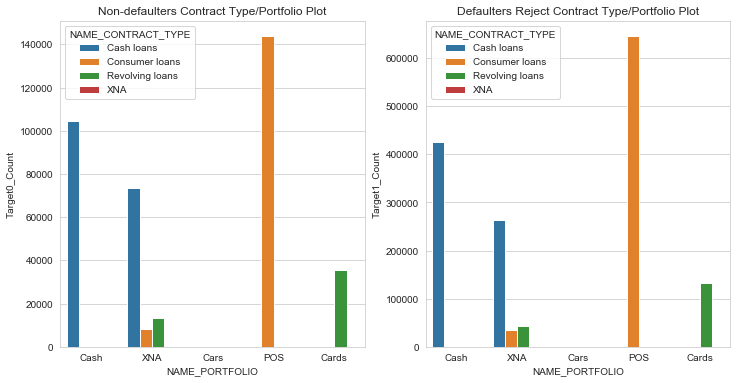

In [64]:
prev_analysis3_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_TYPE','NAME_PORTFOLIO']).size().reset_index(name='Target0_Count')
prev_analysis3_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_TYPE','NAME_PORTFOLIO']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot( x ='NAME_PORTFOLIO',y='Target0_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df0)
plt.title("Non-defaulters Contract Type/Portfolio Plot")
plt.subplot(1, 2, 2)
sns.barplot( x ='NAME_PORTFOLIO',y='Target1_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df1)
plt.title("Defaulters Reject Contract Type/Portfolio Plot")
plt.show()

### Observations:

In [65]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_STATUS','CHANNEL_TYPE'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_STATUS CHANNEL_TYPE                      
Approved             AP+ (Cash loan)               6949
                     Car dealer                      36
                     Channel of corporate sales     446
                     Contact center                5394
                     Country-wide                 85000
                     Credit and cash offices      62985
                     Regional / Local             20114
                     Stone                        37001
Canceled             AP+ (Cash loan)                889
                     Car dealer                      14
                     Channel of corporate sales      23
                     Contact center                8461
                     Country-wide                   483
                     Credit and cash offices      70777
                     Regional / Local                17
                     Stone                           14
Refused              AP+ (Cash loan)               5949
                     Car dealer                      17
                     Channel of corporate sales     629
                     Contact center                4599
                     Country-wide                 15928
                     Credit and cash offices      39859
                     Regional / Local              2819
                     Stone                         4926
Unused offer         Country-wide                  5145
                     Credit and cash offices        102
                     Regional / Local               139
                     Stone                          158

In [66]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_STATUS','CHANNEL_TYPE'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_STATUS CHANNEL_TYPE                      
Approved             AP+ (Cash loan)              28451
                     Car dealer                     272
                     Channel of corporate sales    2533
                     Contact center               23442
                     Country-wide                376118
                     Credit and cash offices     270652
                     Regional / Local             90455
                     Stone                       177615
Canceled             AP+ (Cash loan)               3306
                     Car dealer                      41
                     Channel of corporate sales     130
                     Contact center               28102
                     Country-wide                  1526
                     Credit and cash offices     259264
                     Regional / Local                88
                     Stone                           62
Refused              AP+ (Cash loan)              18919
                     Car dealer                     118
                     Channel of corporate sales    3143
                     Contact center               13705
                     Country-wide                 59495
                     Credit and cash offices     135506
                     Regional / Local             10300
                     Stone                        20054
Unused offer         AP+ (Cash loan)                  5
                     Country-wide                 22623
                     Credit and cash offices        449
                     Regional / Local               652
                     Stone                          828

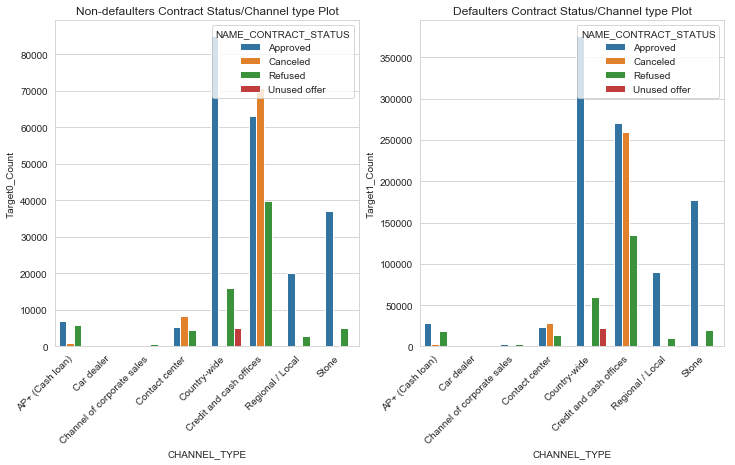

In [69]:
prev_analysis3_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_STATUS','CHANNEL_TYPE']).size().reset_index(name='Target0_Count')
prev_analysis3_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_STATUS','CHANNEL_TYPE']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot1=sns.barplot( x ='CHANNEL_TYPE',y='Target0_Count', hue="NAME_CONTRACT_STATUS", data=prev_analysis3_df0)
plt.title("Non-defaulters Contract Status/Channel type Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
plot2=sns.barplot( x ='CHANNEL_TYPE',y='Target1_Count', hue="NAME_CONTRACT_STATUS", data=prev_analysis3_df1)
plt.title("Defaulters Contract Status/Channel type Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Observations:

In [70]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_TYPE','CHANNEL_TYPE'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE CHANNEL_TYPE                      
Cash loans         AP+ (Cash loan)               9639
                   Car dealer                       1
                   Channel of corporate sales     841
                   Contact center               16341
                   Country-wide                  9111
                   Credit and cash offices     140702
                   Regional / Local               594
                   Stone                          757
Consumer loans     AP+ (Cash loan)                  6
                   Car dealer                      66
                   Country-wide                 90794
                   Credit and cash offices        228
                   Regional / Local             20966
                   Stone                        40042
Revolving loans    AP+ (Cash loan)               4141
                   Channel of corporate sales     257
                   Contact center                2113
                   Country-wide                  6556
                   Credit and cash offices      32793
                   Regional / Local              1529
                   Stone                         1300
XNA                AP+ (Cash loan)                  1
                   Country-wide                    95

In [71]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_TYPE','CHANNEL_TYPE'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE CHANNEL_TYPE                      
Cash loans         AP+ (Cash loan)              36528
                   Car dealer                      27
                   Channel of corporate sales    4485
                   Contact center               54770
                   Country-wide                 38415
                   Credit and cash offices     550178
                   Regional / Local              2800
                   Stone                         3153
Consumer loans     AP+ (Cash loan)                 24
                   Car dealer                     402
                   Country-wide                396413
                   Credit and cash offices        849
                   Regional / Local             93209
                   Stone                       190047
Revolving loans    AP+ (Cash loan)              14129
                   Car dealer                       2
                   Channel of corporate sales    1321
                   Contact center               10479
                   Country-wide                 24654
                   Credit and cash offices     114841
                   Regional / Local              5486
                   Stone                         5359
XNA                Country-wide                   280
                   Credit and cash offices          3

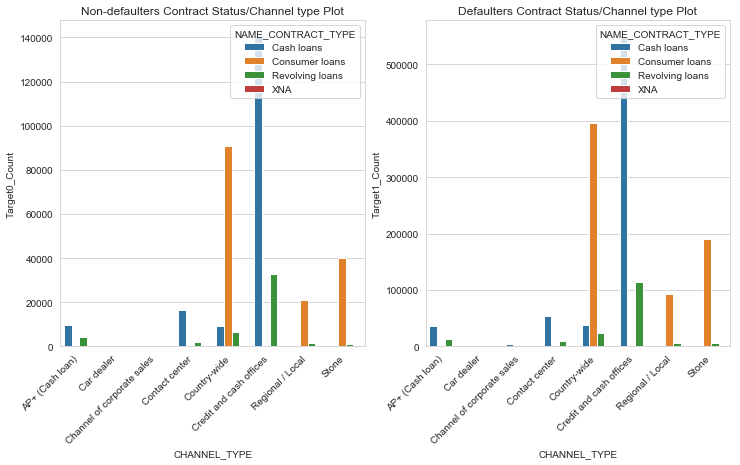

In [72]:
prev_analysis3_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_TYPE','CHANNEL_TYPE']).size().reset_index(name='Target0_Count')
prev_analysis3_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_TYPE','CHANNEL_TYPE']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot1=sns.barplot( x ='CHANNEL_TYPE',y='Target0_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df0)
plt.title("Non-defaulters Contract Status/Channel type Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
plot2=sns.barplot( x ='CHANNEL_TYPE',y='Target1_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df1)
plt.title("Defaulters Contract Status/Channel type Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Observations:

In [76]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_TYPE','NAME_SELLER_INDUSTRY'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE NAME_SELLER_INDUSTRY        
Cash loans         Auto technology           18
                   Clothing                  24
                   Connectivity            4692
                   Construction              58
                   Consumer electronics    5142
                   Furniture                368
                   Industry                  41
                   Jewelry                    6
                   MLM partners             100
                   XNA                   167537
Consumer loans     Auto technology         1272
                   Clothing                5043
                   Connectivity           52034
                   Construction            5885
                   Consumer electronics   71337
                   Furniture              11128
                   Industry                3753
                   Jewelry                  764
                   MLM partners             213
                   Tourism                  154
                   XNA                      519
Revolving loans    Auto technology           43
                   Clothing                 125
                   Connectivity            2803
                   Construction              92
                   Consumer electronics    5895
                   Furniture                382
                   Industry                  28
                   Jewelry                   19
                   MLM partners              38
                   Tourism                    1
                   XNA                    39263
XNA                Connectivity              95
                   XNA                        1

In [77]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_TYPE','NAME_SELLER_INDUSTRY'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE NAME_SELLER_INDUSTRY        
Cash loans         Auto technology           57
                   Clothing                 106
                   Connectivity           16948
                   Construction             279
                   Consumer electronics   24802
                   Furniture               1339
                   Industry                 215
                   Jewelry                   17
                   MLM partners             244
                   XNA                   646349
Consumer loans     Auto technology         4381
                   Clothing               22236
                   Connectivity          225894
                   Construction           27512
                   Consumer electronics  325508
                   Furniture              52144
                   Industry               17690
                   Jewelry                 2466
                   MLM partners             823
                   Tourism                  495
                   XNA                     1795
Revolving loans    Auto technology          129
                   Clothing                 468
                   Connectivity           10962
                   Construction             319
                   Consumer electronics   22145
                   Furniture               1371
                   Industry                  94
                   Jewelry                   39
                   MLM partners              91
                   Tourism                    2
                   XNA                   140651
XNA                Connectivity             280
                   XNA                        3

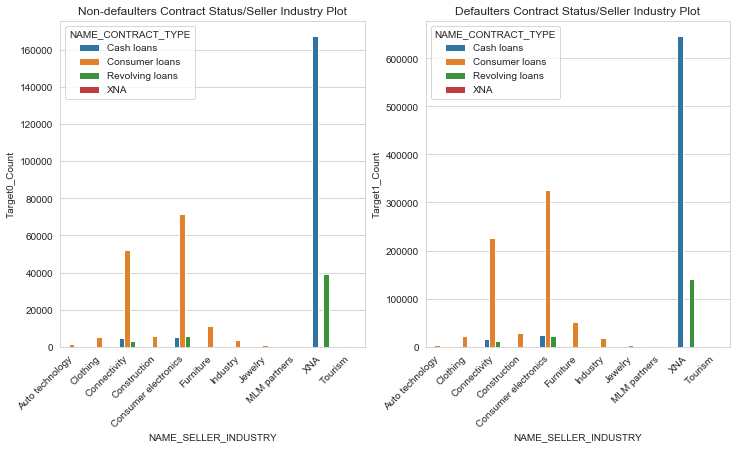

In [78]:
prev_analysis3_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_TYPE','NAME_SELLER_INDUSTRY']).size().reset_index(name='Target0_Count')
prev_analysis3_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_TYPE','NAME_SELLER_INDUSTRY']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot1=sns.barplot( x ='NAME_SELLER_INDUSTRY',y='Target0_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df0)
plt.title("Non-defaulters Contract Status/Seller Industry Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
plot2=sns.barplot( x ='NAME_SELLER_INDUSTRY',y='Target1_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df1)
plt.title("Defaulters Contract Status/Seller Industry Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Observation:

In [79]:
pd.pivot_table(inter_dfTarget0,'TARGET',['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START        
Cash loans         FRIDAY                       28197
                   MONDAY                       30251
                   SATURDAY                     20590
                   SUNDAY                        9547
                   THURSDAY                     28781
                   TUESDAY                      30610
                   WEDNESDAY                    30010
Consumer loans     FRIDAY                       21437
                   MONDAY                       20076
                   SATURDAY                     26801
                   SUNDAY                       23018
                   THURSDAY                     20275
                   TUESDAY                      20253
                   WEDNESDAY                    20242
Revolving loans    FRIDAY                        7690
                   MONDAY                        7721
                   SATURDAY                      6108
                   SUNDAY                        3382
                   THURSDAY                      7780
                   TUESDAY                       8037
                   WEDNESDAY                     7971
XNA                FRIDAY                          22
                   MONDAY                           7
                   SATURDAY                        14
                   SUNDAY                           9
                   THURSDAY                        16
                   TUESDAY                         15
                   WEDNESDAY                       13

In [80]:
pd.pivot_table(inter_dfTarget1,'TARGET',['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START'],aggfunc=np.sum)

TARGET
NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START        
Cash loans         FRIDAY                      110385
                   MONDAY                      117384
                   SATURDAY                     80448
                   SUNDAY                       37316
                   THURSDAY                    111455
                   TUESDAY                     117301
                   WEDNESDAY                   116067
Consumer loans     FRIDAY                       95145
                   MONDAY                       89174
                   SATURDAY                    121008
                   SUNDAY                      103665
                   THURSDAY                     90988
                   TUESDAY                      89971
                   WEDNESDAY                    90993
Revolving loans    FRIDAY                       27798
                   MONDAY                       27951
                   SATURDAY                     22096
                   SUNDAY                       12468
                   THURSDAY                     27854
                   TUESDAY                      28943
                   WEDNESDAY                    29161
XNA                FRIDAY                          49
                   MONDAY                          41
                   SATURDAY                        38
                   SUNDAY                          19
                   THURSDAY                        44
                   TUESDAY                         48
                   WEDNESDAY                       44

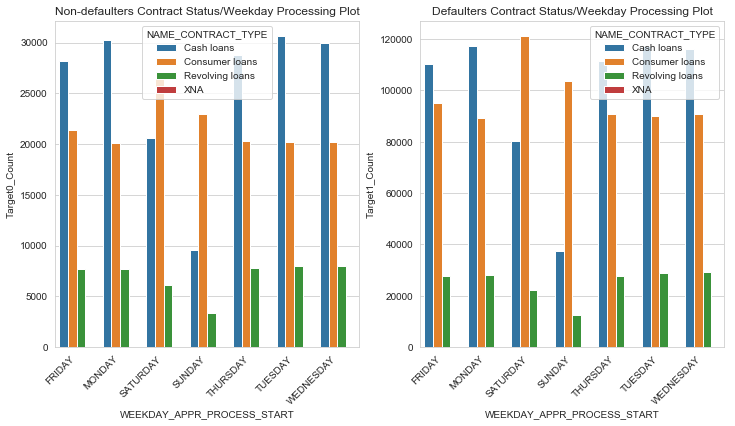

In [81]:
prev_analysis3_df0 = inter_dfTarget0.groupby(['TARGET', 'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START']).size().reset_index(name='Target0_Count')
prev_analysis3_df1 = inter_dfTarget1.groupby(['TARGET', 'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot1=sns.barplot( x ='WEEKDAY_APPR_PROCESS_START',y='Target0_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df0)
plt.title("Non-defaulters Contract Status/Weekday Processing Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
plot2=sns.barplot( x ='WEEKDAY_APPR_PROCESS_START',y='Target1_Count', hue="NAME_CONTRACT_TYPE", data=prev_analysis3_df1)
plt.title("Defaulters Contract Status/Weekday Processing Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Observations: